# Importar librerias

In [12]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Modlos lineales

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

# Para cargar y medir datos

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Cargar DataSet

In [2]:
dataset = pd.read_csv("../data/felicidad.csv")
dataset

,country,rank,score,high,low,gdp,family,lifexp,freedom,generosity,corruption,dystopia
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024


In [3]:
dataset.describe()

,rank,score,high,low,gdp,family,lifexp,freedom,generosity,corruption,dystopia
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


# Dividir Data Train y Test

In [4]:
X = dataset[["gdp", "family", "lifexp", "freedom", "corruption","generosity", "dystopia"]]
y = dataset[["score"]]



In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25)

## Definir regresiones

In [6]:
# Regresion lineal

modelLienar= LinearRegression().fit(X_train,y_train)
y_predict_linear = modelLienar.predict(X_test)

# Regresion lazo
# Entre mas alto el alpha mas penalización 
modelLaso = Lasso(alpha=0.2).fit(X_train,y_train)
y_predict_lasso = modelLaso.predict(X_test)

#Regresion RIgs
modelRidge = Ridge(alpha=1).fit(X_train, y_train)
y_predict_ridge = modelRidge.predict(X_test)

In [7]:
linear_loss = mean_squared_error(y_test,y_predict_linear)
lasso_loss = mean_squared_error(y_test,y_predict_lasso)
ridge_loss = mean_squared_error(y_test,y_predict_ridge)

print("Perdida Modelo lineal: ", linear_loss)
print("Perdida Modelo Lasso: ", lasso_loss)
print("Perdida Modelo Ridge: ", ridge_loss)
print("="*32)
print("Coeficientes Lasso")
print(modelLaso.coef_)

print("Coeficientes Ridge")
print(modelRidge.coef_)


Perdida Modelo lineal:  1.0116567912283074e-07
Perdida Modelo Lasso:  0.5630173894257745
Perdida Modelo Ridge:  0.006229255014010026
Coeficientes Lasso
[1.13324991 0.         0.         0.         0.         0.
 0.16838635]
Coeficientes Ridge
[[1.08146273 0.95690552 0.86323016 0.89806606 0.64722295 0.7445013
  0.9469212 ]]


In [8]:
y_test_array = y_test.to_numpy()  # Convierte la columna 'target' en un array NumPy
y_test_reshaped = y_test_array.reshape(39,)  # Reshape del array NumPy

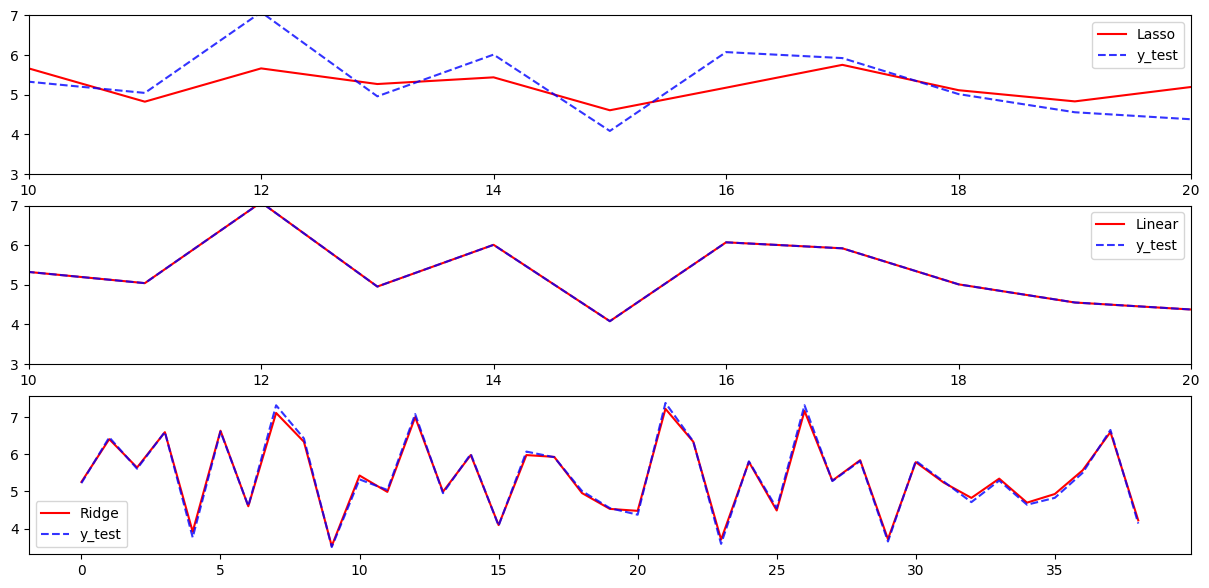

In [9]:

plt.figure(figsize=(15, 7))  # Tamaño de la figura en pulgadas


plt.subplot(3, 1, 1)
plt.plot(y_predict_lasso, label="Lasso", color="red")
plt.plot(y_test_reshaped, linestyle="--", alpha=0.8, color="blue", label="y_test")
plt.legend()
plt.xlim(10, 20)  
plt.ylim(3,7)  

plt.subplot(3, 1, 2)
plt.plot(y_predict_linear, label="Linear", color="red")
plt.plot(y_test_reshaped, linestyle="--", alpha=0.8, color="blue", label="y_test")
plt.legend()
plt.xlim(10, 20)  
plt.ylim(3,7)  

plt.subplot(3, 1, 3)
plt.plot(y_predict_ridge, label="Ridge", color="red")
plt.plot(y_test_reshaped, linestyle="--", alpha=0.8, color="blue", label="y_test")

plt.legend()  # Muestra la leyenda con los nombres de las líneas



plt.show()

/var/folders/52/bzfm61sj2znfqg12w34hpj6c0000gp/T/ipykernel_5243/4230597342.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  q1 = dataset[columna].describe()[4]
/var/folders/52/bzfm61sj2znfqg12w34hpj6c0000gp/T/ipykernel_5243/4230597342.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  q3 = dataset[columna].describe()[6]
/var/folders/52/bzfm61sj2znfqg12w34hpj6c0000gp/T/ipykernel_5243/4230597342.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `

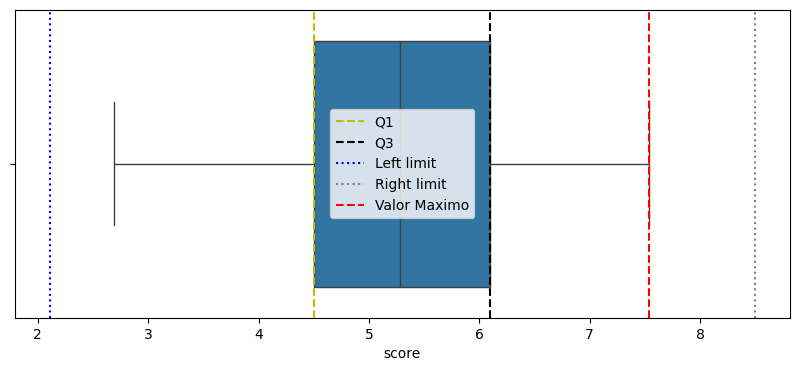

In [78]:
plt.figure(figsize=(10,4))
columna = "score"
# Cuartiles
q1 = dataset[columna].describe()[4]
q3 = dataset[columna].describe()[6]
max_box = dataset[columna].describe()[7]
iqr = q3-q1
# Box plot
sns.boxplot(data=dataset, x=columna)
# Lineas de cuartiles
plt.axvline(x=q1, color='y', linestyle='--', label="Q1") 
plt.axvline(x=q3, color='black', linestyle='--', label="Q3") 
plt.axvline(x=(q1 - (1.5*iqr)), color='blue', linestyle=':', label="Left limit") 
plt.axvline(x=(q3 +1.5*iqr), color='gray', linestyle=':', label="Right limit") 
plt.axvline(x=max_box, color='r', linestyle='--', label="Valor Maximo") 

plt.legend()


In [59]:
dataset["family"].describe()

count    155.000000
mean       1.188898
std        0.287263
min        0.000000
25%        1.042635
50%        1.253918
75%        1.414316
max        1.610574
Name: family, dtype: float64

In [45]:
print((q3 +(1.5*iqr)))
print(q3)


1.9718375
1.414316
